In [ ]:
from google.colab import files


import pandas as pd

# Load the dataset
df = pd.read_csv('hotel_booking.csv')

# Display the first few rows
df.head()

# General information about the dataset
df.info()

# Check for missing values
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Confirm no missing data remains
df_cleaned.isnull().sum()


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
# Cancellation rate
cancellation_rate = df_cleaned['is_canceled'].mean() * 100
print(f'Overall Cancellation Rate: {cancellation_rate:.2f}%')

# Cancellation rate by hotel type
cancellation_by_hotel = df_cleaned.groupby('hotel')['is_canceled'].mean() * 100
print(cancellation_by_hotel)



Overall Cancellation Rate: 7.83%
hotel
City Hotel      4.255319
Resort Hotel    8.823529
Name: is_canceled, dtype: float64


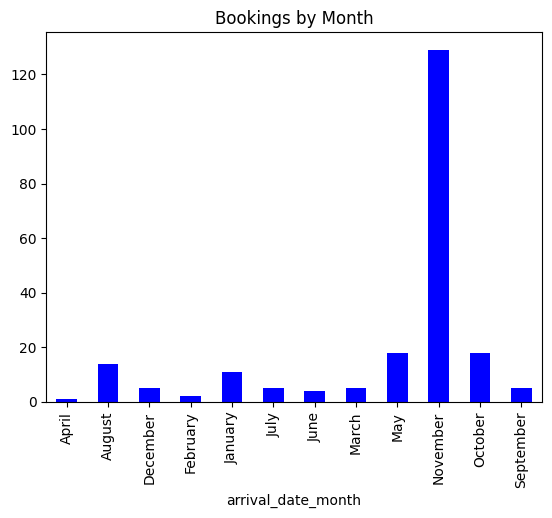

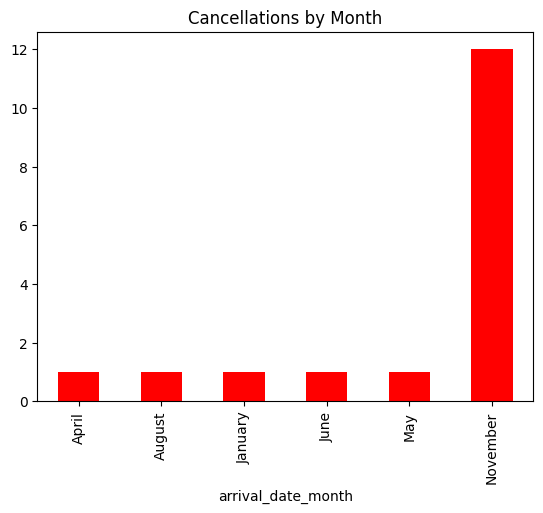

In [ ]:
# Bookings by month
bookings_by_month = df_cleaned['arrival_date_month'].value_counts().sort_index()

# Cancellations by month
cancellations_by_month = df_cleaned[df_cleaned['is_canceled'] == 1]['arrival_date_month'].value_counts().sort_index()

# Plot bookings and cancellations by month
import matplotlib.pyplot as plt

bookings_by_month.plot(kind='bar', title='Bookings by Month', color='blue')
plt.show()

cancellations_by_month.plot(kind='bar', title='Cancellations by Month', color='red')
plt.show()



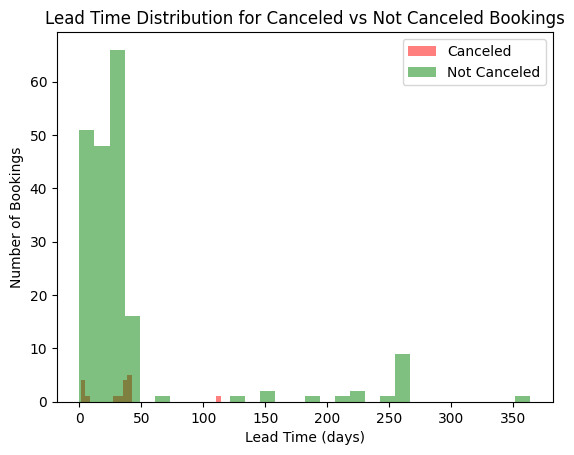

In [ ]:
# Lead time distribution for canceled and non-canceled bookings
lead_time_canceled = df_cleaned[df_cleaned['is_canceled'] == 1]['lead_time']
lead_time_not_canceled = df_cleaned[df_cleaned['is_canceled'] == 0]['lead_time']

# Plot the distributions
plt.hist(lead_time_canceled, bins=30, alpha=0.5, label='Canceled', color='red')
plt.hist(lead_time_not_canceled, bins=30, alpha=0.5, label='Not Canceled', color='green')
plt.legend()
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.title('Lead Time Distribution for Canceled vs Not Canceled Bookings')
plt.show()


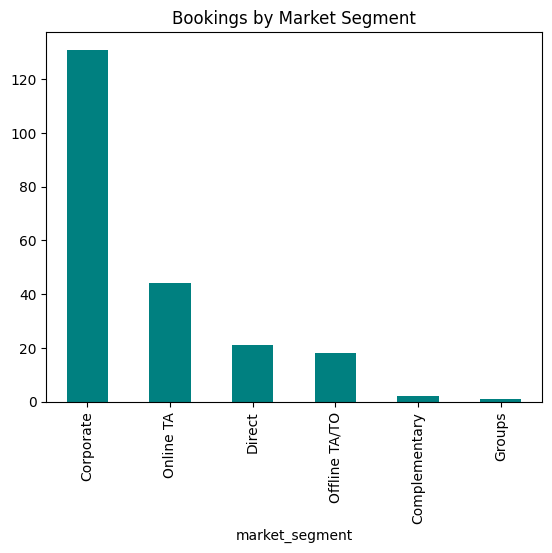

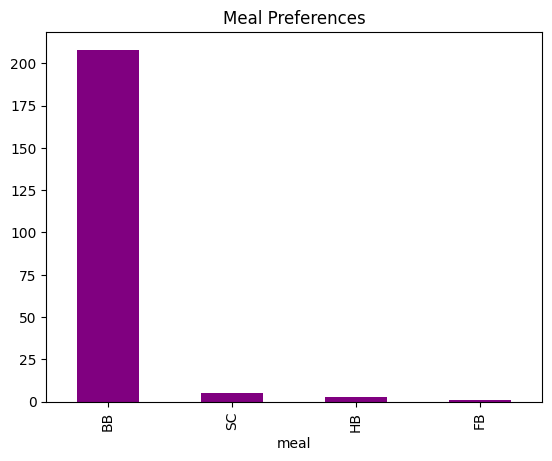

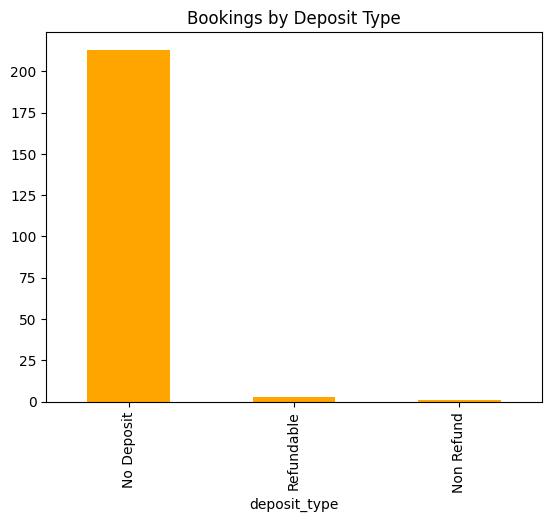

deposit_type
No Deposit    7.981221
Non Refund    0.000000
Refundable    0.000000
Name: is_canceled, dtype: float64


In [ ]:
# Market Segment analysis
df_cleaned['market_segment'].value_counts().plot(kind='bar', title='Bookings by Market Segment', color='teal')
plt.show()

# Meal Preferences analysis
df_cleaned['meal'].value_counts().plot(kind='bar', title='Meal Preferences', color='purple')
plt.show()

# Deposit Type analysis
df_cleaned['deposit_type'].value_counts().plot(kind='bar', title='Bookings by Deposit Type', color='orange')
plt.show()

# Cancellation rate by deposit type
cancellation_by_deposit = df_cleaned.groupby('deposit_type')['is_canceled'].mean() * 100
print(cancellation_by_deposit)


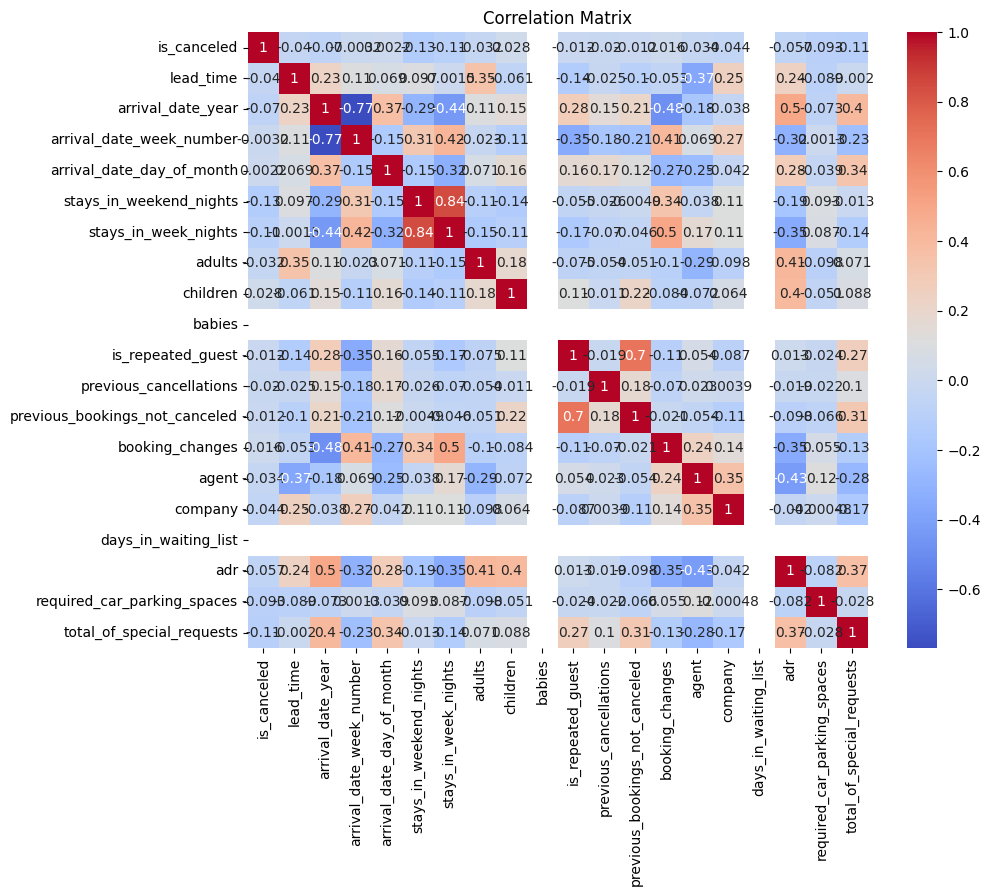

In [ ]:
# Correlation matrix for numeric columns
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



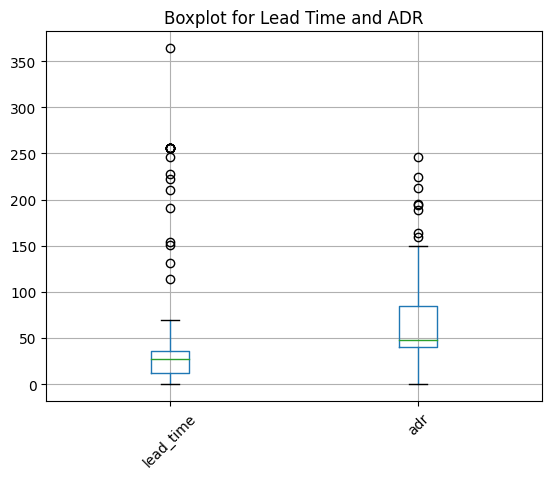

In [ ]:
# Boxplots for lead time and ADR to detect outliers
df_cleaned[['lead_time', 'adr']].boxplot()
plt.title('Boxplot for Lead Time and ADR')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_hotel_booking_data.csv', index=False)
